<a href="https://colab.research.google.com/github/syuan0525/Deeplearning/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = [
      "airplane",										
      "automobile",										
      "bird",										
      "cat",										
      "deer",										
      "dog",										
      "frog",										
      "horse",										
      "ship",										
      "truck",
]

horse


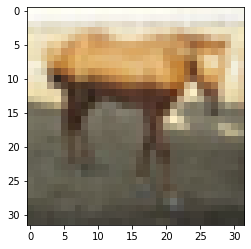

In [4]:
import matplotlib.pyplot as plt
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    #一個filter: 3(kh) * 3(kw)* 3(last channel) + 1(bias) = 28 
    #28 * 64 =1792
    Conv2D(64, 3, padding="same", activation="relu",input_shape=(32,32,3)),
    #一個filter: 3 * 3 * 64 + 1(bias) = 577 
    #128 * 577 = 73856
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [6]:
# y : 做One-hot encoding很耗ram,直接用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy 
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",       
       metrics=["accuracy"])

In [7]:
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

In [8]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar10.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 37s - loss: 1.6764 - accuracy: 0.3885 - val_loss: 1.3743 - val_accuracy: 0.5006
Epoch 2/100
225/225 - 6s - loss: 1.2485 - accuracy: 0.5511 - val_loss: 1.0773 - val_accuracy: 0.6220
Epoch 3/100
225/225 - 6s - loss: 1.0575 - accuracy: 0.6291 - val_loss: 0.9842 - val_accuracy: 0.6520
Epoch 4/100
225/225 - 6s - loss: 0.9203 - accuracy: 0.6768 - val_loss: 0.8558 - val_accuracy: 0.7008
Epoch 5/100
225/225 - 6s - loss: 0.8227 - accuracy: 0.7132 - val_loss: 0.7717 - val_accuracy: 0.7324
Epoch 6/100
225/225 - 6s - loss: 0.7445 - accuracy: 0.7412 - val_loss: 0.7517 - val_accuracy: 0.7426
Epoch 7/100
225/225 - 6s - loss: 0.6723 - accuracy: 0.7633 - val_loss: 0.7018 - val_accuracy: 0.7606
Epoch 8/100
225/225 - 6s - loss: 0.6132 - accuracy: 0.7851 - val_loss: 0.7061 - val_accuracy: 0.7624
Epoch 9/100
225/225 - 6s - loss: 0.5540 - accuracy: 0.8054 - val_loss: 0.6931 - val_accuracy: 0.7612
Epoch 10/100
225/225 - 6s - loss: 0.4985 - accuracy: 0.8251 - val_loss: 0.6696 - val_accur

In [9]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7041 - accuracy: 0.7641


[0.7040888071060181, 0.7641000151634216]

Enter:https://cdn0.techbang.com/system/excerpt_images/80290/original/0a7e31437a6be0675bc9cd13c0b401b1.jpg?1596441451


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


預測: automobile


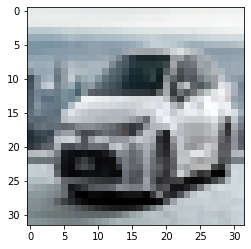

In [12]:
import requests
from PIL import Image
import numpy as np

url = input("Enter:")
response = requests.get(url, stream=True,verify=False)
img = Image.open(response.raw).resize((32,32)).convert("RGB")
img_np = np.array(img).reshape(1, 32, 32, 3)/255.0
ans = model.predict(img_np).argmax(axis=1)
print("預測:", trans[ans[0]])
plt.imshow(img)